In [ ]:
import pickle
from collections import Counter

In [ ]:
data_inc = pickle.load(open("/content/conv_inc.pk", "rb"))

In [ ]:
data_vps = pickle.load(open("/content/convs_vps.pk", "rb"))

In [ ]:
counter_inc=[]
counter_vps=[]
len_data = []
for i in range(0,len(data_inc)):
  counter_inc.append(Counter(data_inc[i]))
  counter_vps.append(Counter(data_vps[i]))
  len_data.append(len(data_vps[i]))

In [ ]:
frac_inc = []
frac_l3 = []
frac_l4 = []
frac_l1 = []
frac_l2 = []
for n,i in enumerate(counter_inc):
  frac_inc.append(i[1]/len_data[n])
  frac_l3.append(counter_vps[n]["L3"]/len_data[n])
  frac_l4.append(counter_vps[n]["L4"]/len_data[n])
  frac_l1.append(counter_vps[n]["L1"]/len_data[n])
  frac_l2.append(counter_vps[n]["L2"]/len_data[n])
  

In [ ]:
inc_per_label=[]
for i in range(0,len(data_inc)):
  L1=0
  L2=0
  L3=0
  L4=0
  for n,j in enumerate(data_inc[i]):
    if j == 1:
      if data_vps[i][n] == "L1":
        L1+=1
      elif data_vps[i][n] == "L2":
        L2+=1
      elif data_vps[i][n] == "L3":
        L3+=1
      elif data_vps[i][n] == "L4":
        L4+=1
  inc_per_label.append((L1,L2,L3,L4))

In [ ]:
c_per_label=[]
for i in range(0,len(data_inc)):
  L1=0
  L2=0
  L3=0
  L4=0
  for n,j in enumerate(data_inc[i]):
    if j == 0:
      if data_vps[i][n] == "L1":
        L1+=1
      elif data_vps[i][n] == "L2":
        L2+=1
      elif data_vps[i][n] == "L3":
        L3+=1
      elif data_vps[i][n] == "L4":
        L4+=1
  c_per_label.append((L1,L2,L3,L4))

In [ ]:
labels = ["L1","L2","L3","L4"]
c=0
pairwise_inc = []
pairwise_inc_list=[]
for i in labels:
  c+=1
  for j in labels[c:]:
    pairwise_inc=[]
    for n,k in enumerate(inc_per_label):
      deno = (k[c-1]+k[c]+c_per_label[n][c-1]+c_per_label[n][c])
      if deno!=0: 
        pairwise_inc.append((k[c-1]+k[c])/(k[c-1]+k[c]+c_per_label[n][c-1]+c_per_label[n][c]))
      else:
        pairwise_inc.append(None)
    pairwise_inc_list.append(pairwise_inc)

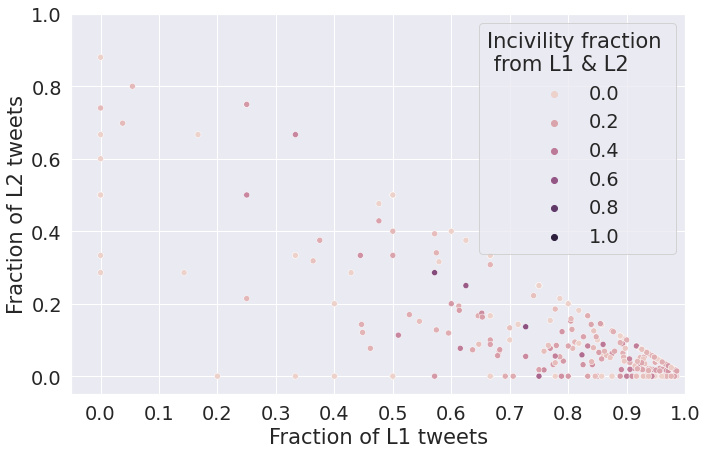

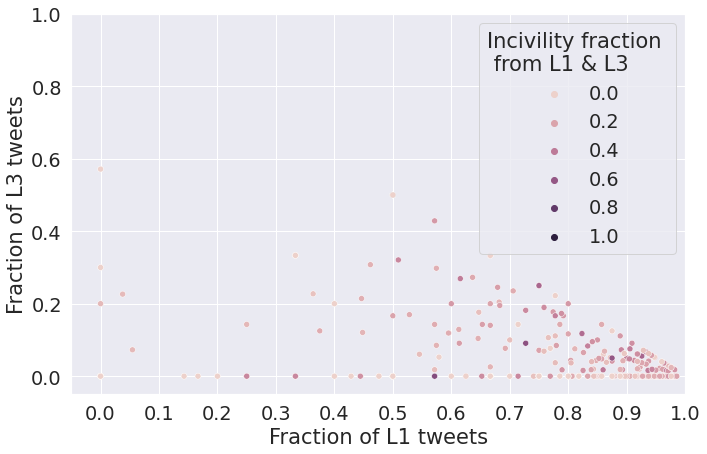

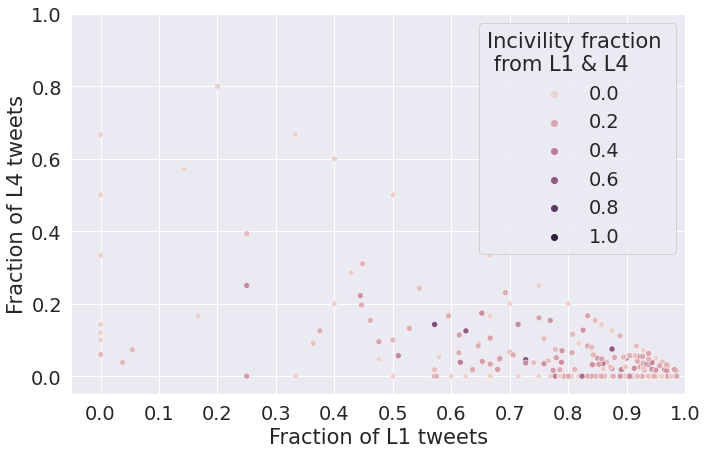

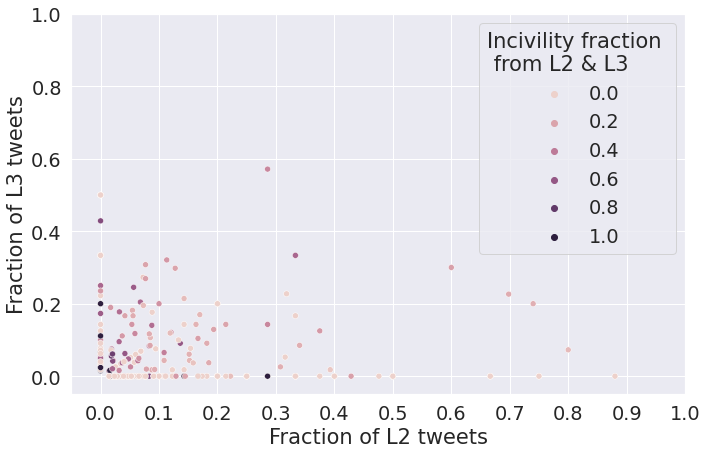

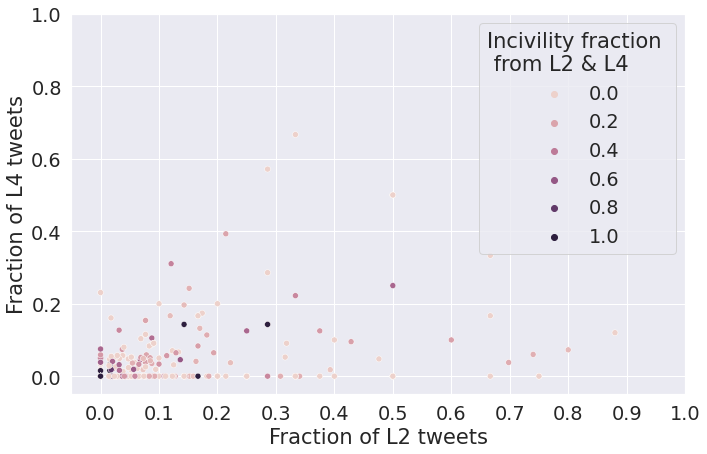

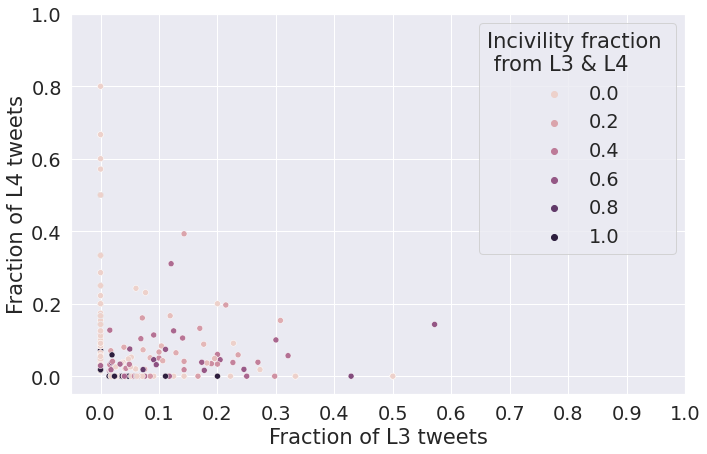

<Figure size 792x504 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
labels = ["L1","L2","L3","L4"]
labels_dict = {"L1":frac_l1, "L2":frac_l2, "L3":frac_l3, "L4":frac_l4}
sns.set(font_scale=1.75,rc={'figure.figsize':(11,7)})
c=0
ctr=0
for i in labels:
  c+=1
  for j in labels[c:]:
    ax1=sns.scatterplot(x=labels_dict[i],y=labels_dict[j],hue=pairwise_inc_list[ctr],legend=True)
    ctr+=1
    ax1.legend(loc="upper right")

    ax1.legend_.set_title(f"Incivility fraction \n from {i} & {j}")
    ax1.set(xlim=(-0.05,1),ylim=(-0.05,1),xlabel=f"Fraction of {i} tweets",ylabel=f"Fraction of {j} tweets")
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    plt.figure()
    ax1.figure.savefig(f"{i}-{j}.png") 

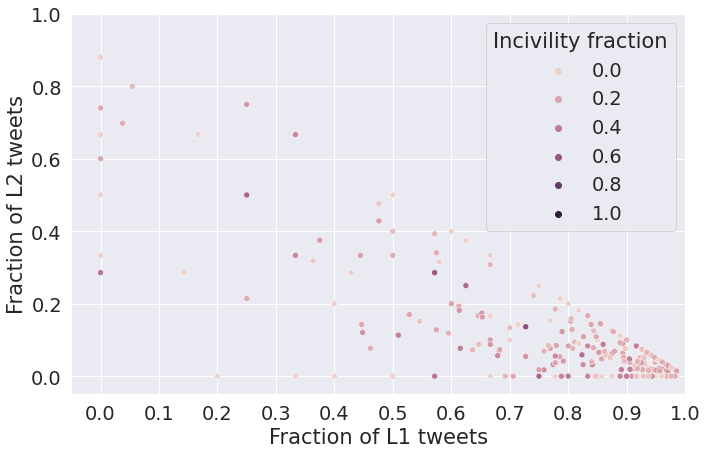

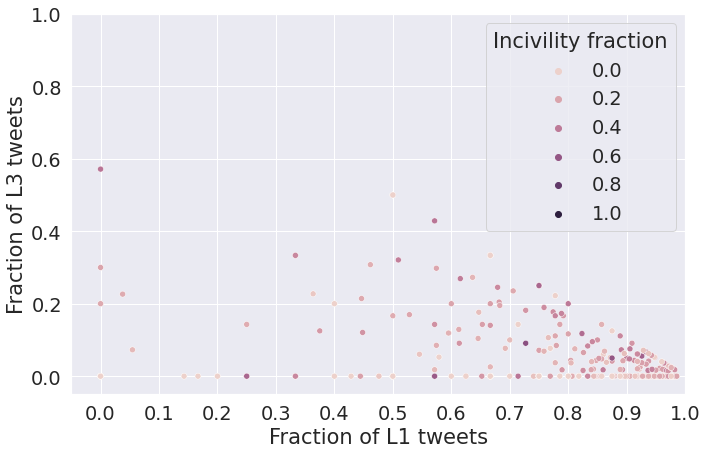

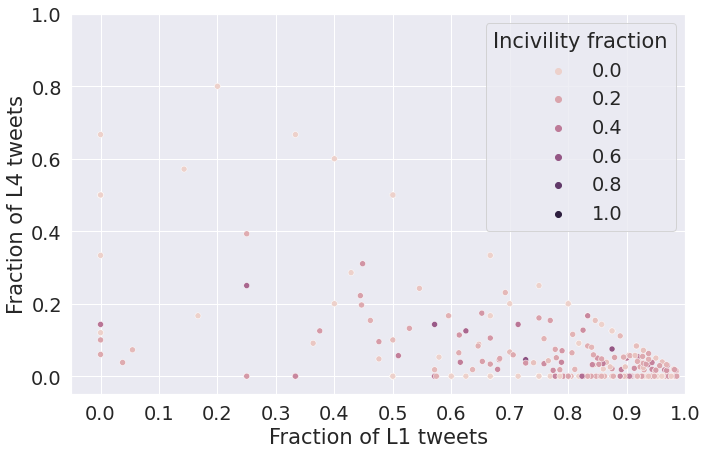

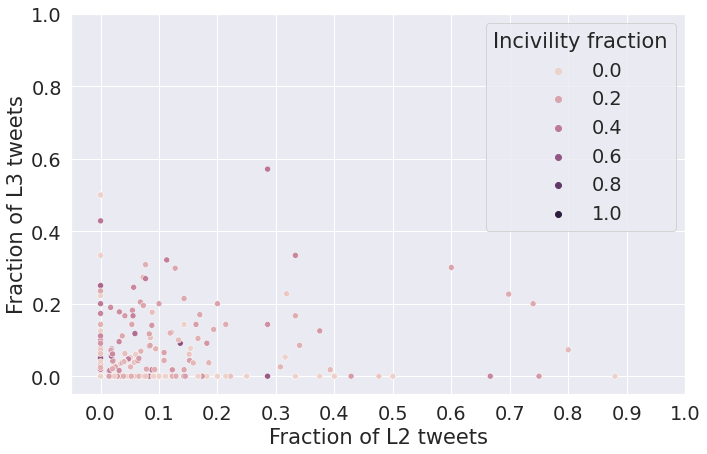

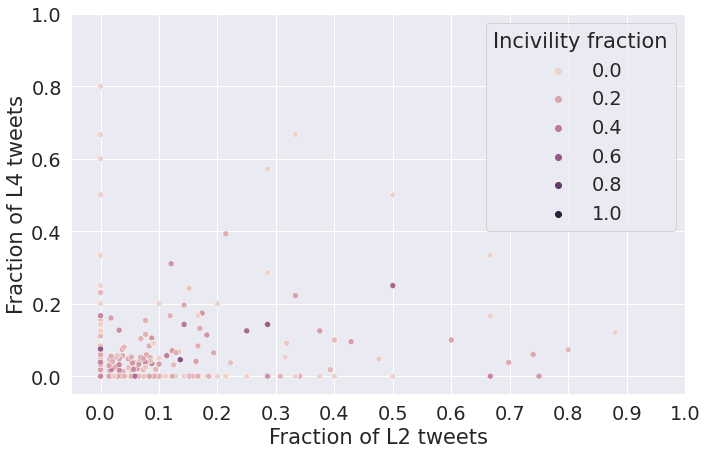

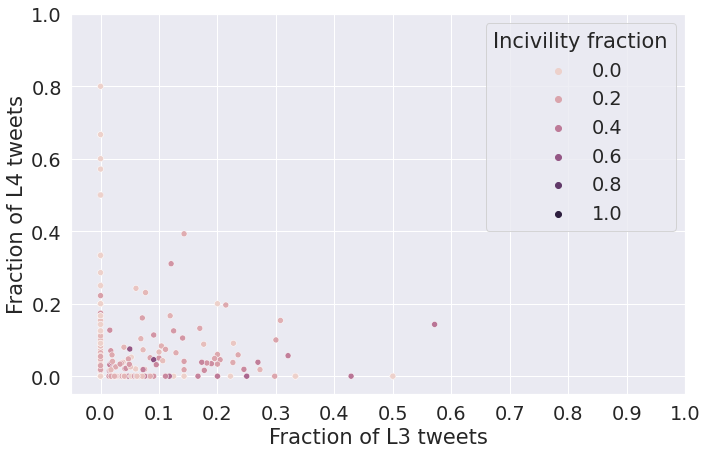

<Figure size 792x504 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
labels = ["L1","L2","L3","L4"]
labels_dict = {"L1":frac_l1, "L2":frac_l2, "L3":frac_l3, "L4":frac_l4}
sns.set(font_scale=1.75,rc={'figure.figsize':(11,7)})
c=0
for i in labels:
  c+=1
  for j in labels[c:]:
    ax1=sns.scatterplot(x=labels_dict[i],y=labels_dict[j],hue=frac_inc,legend=True)
    ax1.legend(loc="upper right")

    ax1.legend_.set_title("Incivility fraction")
    ax1.set(xlim=(-0.05,1),ylim=(-0.05,1),xlabel=f"Fraction of {i} tweets",ylabel=f"Fraction of {j} tweets")
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    plt.figure()
    ax1.figure.savefig(f"{i}-{j}.png") 

In [ ]:
from sklearn.manifold import TSNE
import pandas as pd

df = pd.DataFrame()
df["L1"] = frac_l1
df["L2"] = frac_l2
df["L3"] = frac_l3
df["L4"] = frac_l4

# m = TSNE(learning_rate=20)

# tsne_features = m.fit_transform(df)
# tsne_features[1:4,:]

# df["x"] = tsne_features[:,0]
# df["y"] = tsne_features[:,1]
# len(df["x"])

In [ ]:
df["incivility"] = frac_inc

In [ ]:
df.to_csv("conversation label fractions.tsv",sep="\t")

In [ ]:
ax1=sns.scatterplot(x=df["x"],y=df["y"],hue=frac_inc)#,legend=True)

Linear Regression

In [ ]:
import pandas as pd
df = pd.read_csv("Ml_training_file3.csv")

In [ ]:
df.head

<bound method NDFrame.head of      Unnamed: 0  depth  size        L1        L2        L3        L4  \
0             0      2     4  0.750000  0.000000  0.250000  0.000000   
1             1      2    20  0.850000  0.100000  0.000000  0.050000   
2             2      1     2  0.500000  0.000000  0.000000  0.500000   
3             3      2    16  0.875000  0.000000  0.000000  0.125000   
4             4      4     5  0.400000  0.200000  0.200000  0.200000   
..          ...    ...   ...       ...       ...       ...       ...   
361         361      4    50  0.840000  0.040000  0.040000  0.080000   
362         362      2    11  0.818182  0.090909  0.000000  0.090909   
363         363      1     2  0.500000  0.000000  0.000000  0.500000   
364         364      1     2  0.500000  0.500000  0.000000  0.000000   
365         365      1     9  0.888889  0.000000  0.111111  0.000000   

          inc  num_authors  
0    0.250000            4  
1    0.000000           17  
2    0.500000     

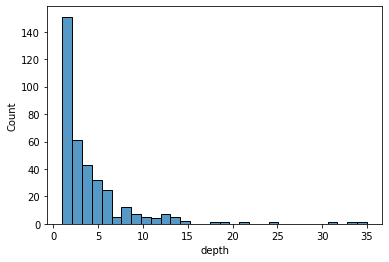

In [ ]:
import seaborn as sns
sns.histplot(x=df.depth)

In [ ]:
#segregation based on size, depth, authors

features=[]
frac_inc=[]
sub=[]
non_sub=[]
for index, rows in df.iterrows():

    # Create list for the current row
    my_list =[rows.L1, rows.L2, rows.L3, rows.L4]
      
    # append the list to the final list
    if rows["size"]<15:
      # features.append(my_list)
      frac_inc.append(rows.inc)
      sub.append(rows.L3 + rows.L4)
      # non_sub.append(rows.L1+rows.L2)
      features.append([rows.L1 + rows.L2, rows.L3 + rows.L4])

In [ ]:
from scipy import stats

In [ ]:
print(stats.pearsonr(frac_inc, sub))

(0.15531491590543392, 0.07314149907396914)


In [ ]:
import numpy as np
X=features
Y=frac_inc
# Y=df.inc.to_list()

In [ ]:
print(len(X),len(Y))

134 134


In [ ]:
from sklearn.linear_model import LinearRegression
  
regressor = LinearRegression()
regressor.fit(X, Y)

In [ ]:
#K-fold cross validation

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, make_scorer

kf = KFold(n_splits=5,shuffle=True) 
kf.get_n_splits(features)
final_y = []
train_y = []
train_pred = []
pred = []

for train_index, test_index in kf.split(features):
  X_train = [features[i] for i in train_index]
  X_test = [features[i] for i in test_index]
  y_train = [Y[i] for i in train_index]
  y_test = [Y[i] for i in test_index]
  regressor.fit(X_train, y_train)
  final_y.extend(y_test)
  train_y.extend(y_train)
  train_pred.extend(regressor.predict(X_train))
  pred.extend(regressor.predict(X_test))

In [ ]:
print(mean_squared_error(final_y,pred,squared=False))

0.2194965505652449


In [ ]:
#prediction where L1=0.3,L2=0.1, vary L3 and L4

import numpy as np
input = [0.5,0.4,0.3,0.2,0.1,0]
input_r = [0, 0.1,0.2,0.3,0.4,0.5]
pred1=[]
for n,i in enumerate(input):
  x= np.array([0.4,0.1,i,input_r[n]]).reshape(1,-1)
  # x= np.array([0.5,i]).reshape(1,-1)
  pred=regressor.predict(x)
  print(f"L1=0.3, L2 = 0.1, L3={i}, L4={input_r[n]}: ", pred)
  pred1.append(pred)

L1=0.3, L2 = 0.1, L3=0.5, L4=0:  [0.19140625]
L1=0.3, L2 = 0.1, L3=0.4, L4=0.1:  [1.97286898e+12]
L1=0.3, L2 = 0.1, L3=0.3, L4=0.2:  [3.94573797e+12]
L1=0.3, L2 = 0.1, L3=0.2, L4=0.3:  [5.91860695e+12]
L1=0.3, L2 = 0.1, L3=0.1, L4=0.4:  [7.89147594e+12]
L1=0.3, L2 = 0.1, L3=0, L4=0.5:  [9.86434492e+12]


In [ ]:
#prediction where L1=0,L2=0, vary L3 and L4

input = [1, 0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0]
input_r = [0, 0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9, 1]
pred2=[]
for n,i in enumerate(input):
  x= np.array([0,0,i,input_r[n]]).reshape(1,-1)
  pred=regressor.predict(x)
  print(f"L1=0, L2 = 0, L3={i}, L4={input_r[n]}: ", pred)
  pred2.append(pred)

L1=0, L2 = 0, L3=1, L4=0:  [0.10546875]
L1=0, L2 = 0, L3=0.9, L4=0.1:  [0.12109375]
L1=0, L2 = 0, L3=0.8, L4=0.2:  [0.140625]
L1=0, L2 = 0, L3=0.7, L4=0.3:  [0.16015625]
L1=0, L2 = 0, L3=0.6, L4=0.4:  [0.17578125]
L1=0, L2 = 0, L3=0.5, L4=0.5:  [0.19140625]
L1=0, L2 = 0, L3=0.4, L4=0.6:  [0.2109375]
L1=0, L2 = 0, L3=0.3, L4=0.7:  [0.23046875]
L1=0, L2 = 0, L3=0.2, L4=0.8:  [0.24609375]
L1=0, L2 = 0, L3=0.1, L4=0.9:  [0.26171875]
L1=0, L2 = 0, L3=0, L4=1:  [0.28125]


In [ ]:
#prediction where L1=0,L2=0.2, vary L3 and L4

import numpy as np
input = [0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0]
input_r = [0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
pred3=[]
for n,i in enumerate(input):
  x= np.array([0,0.2,i,input_r[n]]).reshape(1,-1)
  pred=regressor.predict(x)
  print(f"L1=0.3, L2 = 0.1, L3={i}, L4={input_r[n]}: ", pred)
  pred3.append(pred)

L1=0.3, L2 = 0.1, L3=0.8, L4=0:  [0.5625]
L1=0.3, L2 = 0.1, L3=0.7, L4=0.1:  [0.4765625]
L1=0.3, L2 = 0.1, L3=0.6, L4=0.2:  [0.3828125]
L1=0.3, L2 = 0.1, L3=0.5, L4=0.3:  [0.296875]
L1=0.3, L2 = 0.1, L3=0.4, L4=0.4:  [0.203125]
L1=0.3, L2 = 0.1, L3=0.3, L4=0.5:  [0.1171875]
L1=0.3, L2 = 0.1, L3=0.2, L4=0.6:  [0.03125]
L1=0.3, L2 = 0.1, L3=0.1, L4=0.7:  [-0.0546875]
L1=0.3, L2 = 0.1, L3=0, L4=0.8:  [-0.1484375]


In [ ]:
all_preds = []
all_preds.append(pred1)
all_preds.append(pred2)
all_preds.append(pred3)

In [ ]:
np.save("all_preds_depth_4.npy",all_preds)

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


#Incivility distribution per label

In [ ]:
vps = []
inc = []

for i in range(0,len(data_inc)):
  vps.extend((data_vps[i]))
  inc.extend((data_inc[i]))

In [ ]:
vps_inc = {"L1":0,"L2":0,"L3":0,"L4":0}
vps_c = {"L1":0,"L2":0,"L3":0,"L4":0}

for n,i in enumerate(vps):
  if inc[n]==1:
    vps_inc[i]+=1
  else:
    vps_c[i]+=1

In [ ]:
print(vps_inc)
print(vps_c)

{'L1': 1946, 'L2': 81, 'L3': 168, 'L4': 105}
{'L1': 7898, 'L2': 765, 'L3': 332, 'L4': 268}


In [ ]:
inc_dict = {}
inc_dict["L1"] = vps_inc["L1"]/(vps_inc["L1"]+vps_c["L1"])
inc_dict["L2"] = vps_inc["L2"]/(vps_inc["L2"]+vps_c["L2"])
inc_dict["L3"] = vps_inc["L3"]/(vps_inc["L3"]+vps_c["L3"])
inc_dict["L4"] = vps_inc["L4"]/(vps_inc["L4"]+vps_c["L4"])


In [ ]:
inc_dict

{'L1': 0.19768386834620072,
 'L2': 0.09574468085106383,
 'L3': 0.336,
 'L4': 0.28150134048257375}

In [ ]:
c_dict={}
for k in inc_dict:
  c_dict[k] = 1-inc_dict[k]

In [ ]:
c_dict

{'L1': 0.8023161316537992,
 'L2': 0.9042553191489362,
 'L3': 0.6639999999999999,
 'L4': 0.7184986595174263}

In [ ]:
list(inc_dict.keys())

['L1', 'L2', 'L3', 'L4']

[Text(0, 0.5, 'percentage of incivil tweets'), Text(0.5, 0, 'viewpoints')]

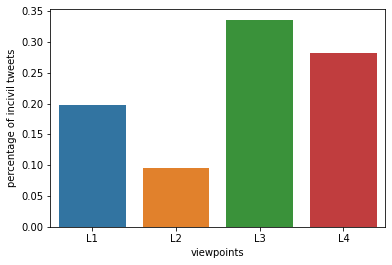

In [ ]:
sns.barplot(x=list(inc_dict.keys()), y=list(inc_dict.values())).set(xlabel="viewpoints",ylabel="percentage of incivil tweets")

#Modertaion effect analysis

In [1]:
import pandas as pd
df = pd.read_csv("Ml_training_file3.csv")

In [2]:
# df.drop("Unnamed: 0",axis=1,inplace=True)
df["sub"] = df.L3 + df.L4
df["non_sub"] = df.L1 + df.L2
df.head()

,Unnamed: 0,depth,size,L1,L2,L3,L4,inc,num_authors,sub,non_sub
0,0,2,4,0.750,0.0,0.25,0.000,0.2500,4,0.250,0.750
1,1,2,20,0.850,0.1,0.00,0.050,0.0000,17,0.050,0.950
2,2,1,2,0.500,0.0,0.00,0.500,0.5000,2,0.500,0.500
3,3,2,16,0.875,0.0,0.00,0.125,0.1875,14,0.125,0.875
4,4,4,5,0.400,0.2,0.20,0.200,0.0000,2,0.400,0.600


In [3]:
from statsmodels.regression import linear_model
X = df.drop('inc', axis=1)
y = df['inc']
model = linear_model.OLS(y, X).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    inc   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     4.261
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           0.000367
Time:                        12:04:59   Log-Likelihood:                 158.07
No. Observations:                 366   AIC:                            -302.1
Df Residuals:                     359   BIC:                            -274.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
depth          -0.0010      0.003     -0.339      0.735      -0.007       0.005
size            0.0004      0.001      0.373      0.709      -0.002       0.003
L1              0.0979      0.023      4.337      0.000       0.053       0.142
L2             -0.0446      0.033     -1.348      0.178      -0.110       0.020
L3              0.1769      0.056      3.157      0.002       0.067       0.287
L4              0.0299      0.047      0.636      0.525      -0.063       0.122
num_authors     0.0010      0.001      0.771      0.442      -0.002       0.003
sub             0.2068      0.033      6.262      0.000       0.142       0.272
non_sub         0.0533      0.017      3.163      0.002       0.020       0.086
==============================================================================
Omnibus:                      145.761   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              645.295
Skew:                           1.685   Prob(JB):                    7.52e-141
Kurtosis:                       8.564   Cond. No.                     8.46e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.15e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
col =['depth', 'size', 'L1', 'L2', 'L3', 'L4', 'num_authors', 'sub','non_sub']
col_list=[]
for n,i in enumerate(col):
  col_list.append(i)

for n,i in enumerate(col):
  for c in col[n+1:]:
    col_list.append(col[n]+":"+c)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures#generating interaction terms
x_interaction = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(X)

interaction_df = pd.DataFrame(x_interaction, columns = col_list)
interaction_model = linear_model.OLS(y, interaction_df).fit()

In [ ]:
interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    inc   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     2.371
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           0.000389
Time:                        14:13:50   Log-Likelihood:                 173.73
No. Observations:                 366   AIC:                            -297.5
Df Residuals:                     341   BIC:                            -199.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
depth                  -0.0108      0.008     -1.289      0.198      -0.027       0.006
size                   -0.0011      0.004     -0.306      0.760      -0.008       0.006
L1                      0.0621      0.043      1.458      0.146      -0.022       0.146
L2                      0.0613      0.059      1.046      0.296      -0.054       0.176
L3                      0.0954      0.103      0.921      0.358      -0.108       0.299
L4                     -0.0176      0.065     -0.272      0.786      -0.145       0.110
num_authors             0.0018      0.005      0.387      0.699      -0.007       0.011
sub                     0.0777      0.090      0.865      0.387      -0.099       0.254
non_sub                 0.1234      0.042      2.930      0.004       0.041       0.206
depth:size           3.311e-05      0.000      0.230      0.818      -0.000       0.000
depth:L1                0.0116      0.013      0.918      0.359      -0.013       0.037
depth:L2               -0.0135      0.020     -0.670      0.503      -0.053       0.026
depth:L3                0.0227      0.045      0.511      0.610      -0.065       0.110
depth:L4               -0.0317      0.043     -0.742      0.459      -0.116       0.052
depth:num_authors       0.0002      0.000      1.295      0.196      -0.000       0.001
depth:sub              -0.0090      0.016     -0.572      0.568      -0.040       0.022
depth:non_sub          -0.0019      0.010     -0.182      0.856      -0.022       0.018
size:L1                 0.0039      0.006      0.692      0.489      -0.007       0.015
size:L2                -0.0050      0.010     -0.524      0.601      -0.024       0.014
size:L3                -0.0017      0.016     -0.108      0.914      -0.032       0.029
size:L4                 0.0017      0.016      0.103      0.918      -0.030       0.033
size:num_authors    -4.182e-05   4.49e-05     -0.932      0.352      -0.000    4.64e-05
size:sub             -1.28e-05      0.007     -0.002      0.999      -0.014       0.014
size:non_sub           -0.0011      0.005     -0.220      0.826      -0.011       0.009
L1:L2                   0.0088      0.280      0.031      0.975      -0.542       0.560
L1:L3                  -0.2502      0.185     -1.353      0.177      -0.614       0.114
L1:L4                   0.4334      0.139      3.129      0.002       0.161       0.706
L1:num_authors         -0.0013      0.006     -0.210      0.833      -0.013       0.011
L1:sub                  0.1832      0.100      1.830      0.068      -0.014       0.380
L1:non_sub             -0.1211      0.071     -1.711      0.088      -0.260       0.018
L2:L3                   0.3423      0.260      1.317      0.189      -0.169       0.853
L2:L4                  -0.3039      0.197     -1.539      0.125      -0.692       0.085
L2:

In [ ]:
interaction_model.pvalues[interaction_model.pvalues < 0.05]

non_sub    0.003621
L1:L4      0.001905
dtype: float64